In [ ]:
#!git clone https://github.com/JuliusPain/OG-ZAF.git

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/OG-ZAF/examples/

/content/drive/MyDrive/OG-ZAF/examples


In [ ]:
!pip install ogzaf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/1

In [ ]:
# Need to fix references to Calculator, reform json, and substitute new tax
# function call
import multiprocessing
from distributed import Client
import os
import json
import pickle
import time
import copy
import importlib.resources
import matplotlib.pyplot as plt
from ogcore.parameters import Specifications
from ogcore import output_tables as ot
from ogcore import output_plots as op
from ogcore.execute import runner
from ogcore.utils import safe_read_pickle, param_dump_json

In [ ]:
# Use a custom matplotlib style file for plots
plt.style.use("ogcore.OGcorePlots")

In [ ]:
# Define parameters to use for multiprocessing
num_workers = min(multiprocessing.cpu_count(),7)
client = Client(n_workers=num_workers, threads_per_worker=1)
print("Number of workers = ", num_workers)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44325
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39075'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42201'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35277'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40351'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44319'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44587'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42939'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:34929 name: 0
INFO:distributed.scheduler:Star

Number of workers =  7


In [ ]:
# Directories to save data
CUR_DIR = os.path.dirname("/content/drive/MyDrive/OG-ZAF/examples/")
save_dir = os.path.join(CUR_DIR, "OG-ZAF-MultipleIndustry-example")
base_dir = os.path.join(save_dir, "OUTPUT_BASELINE")
reform_dir = os.path.join(save_dir, "OUTPUT_REFORM")

In [ ]:
# Set up baseline parameterization
p = Specifications(
    baseline=True,
    num_workers=num_workers,
    baseline_dir=base_dir,
    output_base=base_dir,
)

In [ ]:
# Update parameters for baseline from default json file
with open('/content/drive/MyDrive/OG-ZAF/ogzaf/ogzaf_default_parameters_multisector.json', 'r') as file:
    defaults = json.load(file)
p.update_specifications(defaults)

In [ ]:
# Run model
start_time = time.time()
runner(p, time_path=True, client=client)
print("run time = ", time.time() - start_time)

making dir:  /content/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/OUTPUT_BASELINE/SS
making dir:  /content/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/OUTPUT_BASELINE/TPI
In runner, baseline is  True
SS using initial guess factors for r and TR of 1.0 and 1.0 , respectively.
GE loop errors =  [0.004037342801324145, 0.003929447984157383, -0.1612368082815716, 0.4304303672348242, 6.401791351307592, -0.3928230419155311, 0.0, 1.9919543678489813, 0.005227691170410605, 0.0017984318322971733, 0.0021675261961197883, 0.03147709656172726, 0.0511491458754642, 0.12070757202947562, 0.01982610590725882, 0.08167012908180823, 0.06632578408266761]
GE loop errors =  [0.003481449429214599, 0.003286041269915163, -0.13584928916745032, 0.4418380740316237, 6.460820764721142, -0.3879807952251244, 0.0, 2.046155245176257, 0.00747480226506075, 0.030670269528556594, 0.0389335092653531, 0.03146025656580862, 0.05112183157811872, 0.12064322964992989, 0.0198155415644519, 0.08389236505222653, 0.06190464141495643

In [ ]:
# create new Specifications object for reform simulation.
p2 = copy.deepcopy(p)
p2.baseline = False
p2.output_base = reform_dir

In [ ]:
# In this scenario, a two percent VAT rate hike and a spending cut are introduced. They are staggared over 4 years
updated_params_ref = {
    "tau_c": [
        [0.15,0.155,0.16,0.165,0.17],
    ],
    "alpha_G": [0.23,0,0.22,0.21,0.20],
}
p2.update_specifications(updated_params_ref)

In [ ]:
# Run model
start_time = time.time()
runner(p2, time_path=True, client=client)
print("run time = ", time.time() - start_time)
client.close()

making dir:  /content/drive/MyDrive/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/OUTPUT_REFORM/SS
making dir:  /content/drive/MyDrive/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/OUTPUT_REFORM/TPI
In runner, baseline is  False
Shape HH =  (80, 7) 80 7
Shape firm =  (4,) 4
Using previous solutions for SS
GE loop errors =  [1.2719317243128914e-05, 1.4798482005404234e-05, -0.0006057450789485053, -0.0002140644693291449, -0.0005175467006015566, -0.00014458276091677824, 0.0, 0.0056128083850923716, -7.493753991733715e-05, -0.00010072029021639117, -0.00011377437303648763, -8.405253876145324e-05, -0.0001291297462152896, -0.0002763972527154157, -4.354135170158216e-05, 0.000230125143788798]
GE loop errors =  [1.2719317243121975e-05, 1.4798482005404234e-05, -0.0006057450789480612, -0.00021406446932892287, -0.0005175467006011125, -0.00014458276091666722, 0.0, 0.00561280838509326, -7.493753991733021e-05, -0.00010072029021639117, -0.00011377437303648763, -8.405253876147406e-05, -0.0001291297462

INFO:distributed.scheduler:Remove client Client-58e525b3-fb0f-11ef-99c8-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:44632; closing.
INFO:distributed.scheduler:Remove client Client-58e525b3-fb0f-11ef-99c8-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-58e525b3-fb0f-11ef-99c8-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1741326628.82662') (0, 1, 2, 3, 4, 5, 6)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:39075'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42201'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35277'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1

Max absolute value resource constraint error: 0.000551917184909434
Checking time path for violations of constraints.
Max Euler error, savings:  3.148592497836944e-12
Max Euler error labor supply:  1.4441781104324036e-12
Time path iteration complete.
It took 3682.5621712207794 seconds to get that part done.
run time =  3682.563291788101


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:44319' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:39075' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:40351' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:42939' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:44587' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:42201' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:35277' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms


In [ ]:
#Save some of the results.

base_tpi = safe_read_pickle(os.path.join(base_dir, "TPI", "TPI_vars.pkl"))
base_params = safe_read_pickle(os.path.join(base_dir, "model_params.pkl"))
reform_tpi = safe_read_pickle(
    os.path.join(reform_dir, "TPI", "TPI_vars.pkl")
)
reform_params = safe_read_pickle(
    os.path.join(reform_dir, "model_params.pkl")
)
ans = ot.macro_table(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y", "C", "K", "L", "r", "w"],
    output_type="pct_diff",
    num_years=10,
    start_year=base_params.start_year,
)

In [ ]:
import os
print(os.getcwd())

/content/OG-ZAF/ogzaf


In [ ]:
!ls -l

total 8
drwx------ 4 root root 4096 Mar  6 19:25 OUTPUT_BASELINE
drwx------ 2 root root 4096 Mar  6 20:31 OUTPUT_REFORM


In [ ]:
%cd /content/drive/MyDrive/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/


/content/drive/MyDrive/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example


In [ ]:
# Load baseline and reform parameters, steady-state, and transition path
# objects
base_path = (
    "/content/drive/MyDrive/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/" +
    "OUTPUT_BASELINE/"
)
ref_path = (
    "/content/drive/MyDrive/OG-ZAF/examples/OG-ZAF-MultipleIndustry-example/" +
    "OUTPUT_REFORM/"
)
p_bas = pickle.load(open(os.path.join(base_path, "model_params.pkl"), "rb"))
p_ref = pickle.load(open(os.path.join(ref_path, "model_params.pkl"), "rb"))
ss_vars_bas = pickle.load(
    open(os.path.join(base_path, "SS", "SS_vars.pkl"), "rb")
)
ss_vars_ref = pickle.load(
    open(os.path.join(ref_path, "SS", "SS_vars.pkl"), "rb")
)
tpi_vars_bas = pickle.load(
    open(os.path.join(base_path, "TPI", "TPI_vars.pkl"), "rb")
)
tpi_vars_ref = pickle.load(
    open(os.path.join(ref_path, "TPI", "TPI_vars.pkl"), "rb")
)

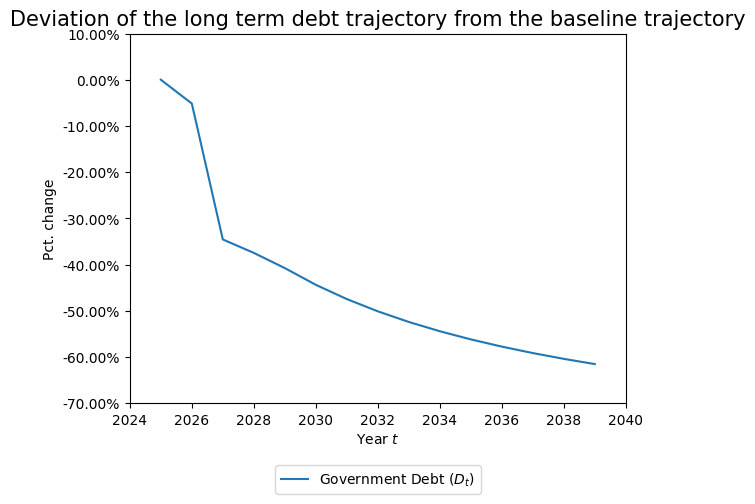

In [ ]:
fig1 = op.plot_aggregates(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["D"],
    plot_type="pct_diff", num_years_to_plot=15,
    vertical_line_years=[p_bas.start_year + p_bas.tG1, p_bas.start_year + p_bas.tG2],
    plot_title="Deviation of the long term debt trajectory from the baseline trajectory"
)

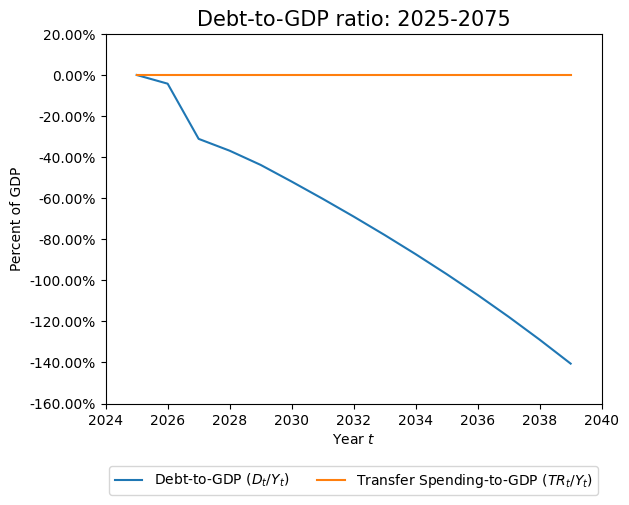

In [ ]:
fig3 = op.plot_gdp_ratio(
    tpi_vars_bas, p_bas, tpi_vars_ref, p_ref, var_list=["D", "TR"], num_years_to_plot=15,
    start_year=p_bas.start_year, plot_type="diff",
    vertical_line_years=[p_bas.start_year + p_bas.tG1, p_bas.start_year + p_bas.tG2],
    plot_title="Debt-to-GDP ratio: 2025-2075"
)